# K-Means Clustering

Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid.

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

After choosing a number of clusters and the initial centroids, the expectation-maximization step is repeated until the centroid positions reach convergence and are unchanged.

The random initialization step causes the k-means algorithm to be nondeterministic, meaning that cluster assignments will vary if you run the same algorithm twice on the same dataset. Researchers commonly run several initializations of the entire k-means algorithm and choose the cluster assignments from the initialization with the lowest SSE. 

In [79]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
# pd.set_option("styler.format.precision", 3) # rounds floats

df = pd.read_csv('../data/country-data.csv')
countries = df['country'].tolist()
df = df.drop(['country'], axis=1)



In [80]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df) # numpy array


init - controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.

n_clusters - sets k for the clustering step. This is the most important parameter for k-means.

n_init - sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter - sets the number of maximum iterations for each initialization of the k-means algorithm.


# Choosing the Appropriate Number of Clusters

c:\Users\sutov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


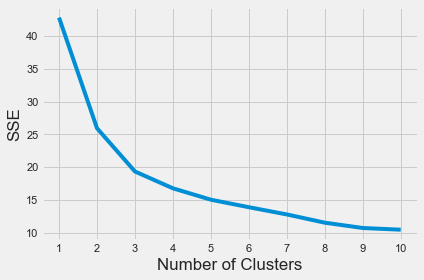

In [99]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [100]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300)

In [101]:
kmeans.fit(scaled_data)
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [102]:
# The lowest SSE value
kmeans.inertia_

19.345118591450646

In [103]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.09652182, 0.20147696, 0.27380866, 0.26944838, 0.09777085,
        0.10922302, 0.79847255, 0.18032426, 0.06193426],
       [0.44150332, 0.14597042, 0.28144675, 0.24855348, 0.02337632,
        0.15069832, 0.5383329 , 0.62148539, 0.01398231],
       [0.01118375, 0.29177116, 0.44172956, 0.29575955, 0.36332096,
        0.0623325 , 0.94961961, 0.0932402 , 0.40934   ]])

In [104]:
# The number of iterations required to converge
kmeans.n_iter_

7

In [105]:
#append cluster assingments to original data
df['cluster'] = kmeans.labels_
df['country'] = countries

#view updated data
print(df)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  cluster              country  
0         5.82    553        1   

In [106]:
# for i in range(4):
#     print('cluster ', i , ':\n',df[df.cluster==i]['country'], '\n')
df[df.cluster==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Algeria
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Antigua and Barbuda
5,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0,Argentina
6,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,Armenia
...,...,...,...,...,...,...,...,...,...,...,...
160,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,Uruguay
161,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,Uzbekistan
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Vanuatu
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Venezuela


In [107]:
df[df.cluster==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,Afghanistan
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,Angola
17,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,Benin
25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,Burkina Faso
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,Burundi
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,Cameroon
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,Central African Republic
32,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,Chad
36,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,Comoros
37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1,"Congo, Dem. Rep."


In [108]:
df[df.cluster==2]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,Australia
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,Austria
15,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,Belgium
23,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2,Brunei
29,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,Canada
42,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,Cyprus
43,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2,Czech Republic
44,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,Denmark
53,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,Finland
54,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2,France
